In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os, sys
sys.path.insert(0, '/home/chris/merlins-mirror')
from dotenv import load_dotenv
load_dotenv()
import PIL

In [4]:
# from mirror_ai.pipeline_dream_pcm_sd15 import ImagePipeline
# from mirror_ai.pipeline_sdxl_hyper import ImagePipeline
from mirror_ai.pipeline_sdxl_t2i import ImagePipeline, get_preprocessor

MODEL SETUP (device, dtype): cuda, torch.float16


/home/chris/merlins-mirror/.venv/lib/python3.12/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/chris/merlins-mirror/.venv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


In [13]:
sample_image = PIL.Image.open("../persist/image_orig_shape_(640, 480).jpg")

In [6]:
# set up the image transformer and the webcam stream
image_pipeline = ImagePipeline()
pipeline = image_pipeline.load("ddim")
pipeline;

--- Starting Pipeline Loading Process ---
Loading SDXL Lightning 2-Step UNet...
Creating the pipeline...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Configuring Scheduler (K_EULER, spacing='trailing')...
Scheduler Configured.
Latents shape: torch.Size([1, 4, 64, 64])
Pipeline loaded.


In [7]:
pipeline;

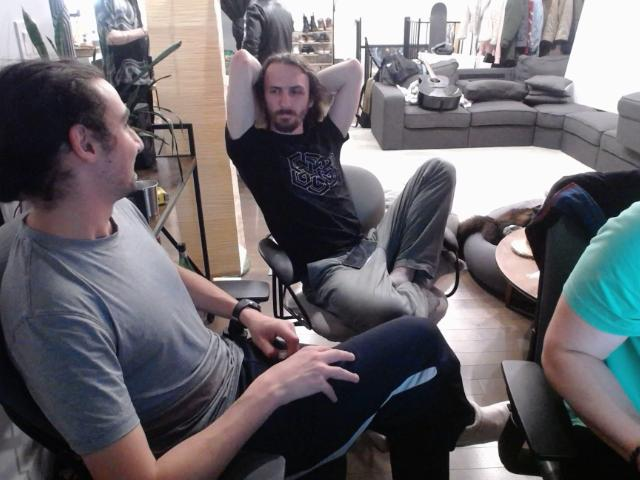

In [14]:
sample_image

In [15]:
prompt = "Empty living room"
from mirror_ai import config

pose_image = get_preprocessor("openpose")(sample_image)
depth_image = get_preprocessor("depth-zoe")(sample_image)


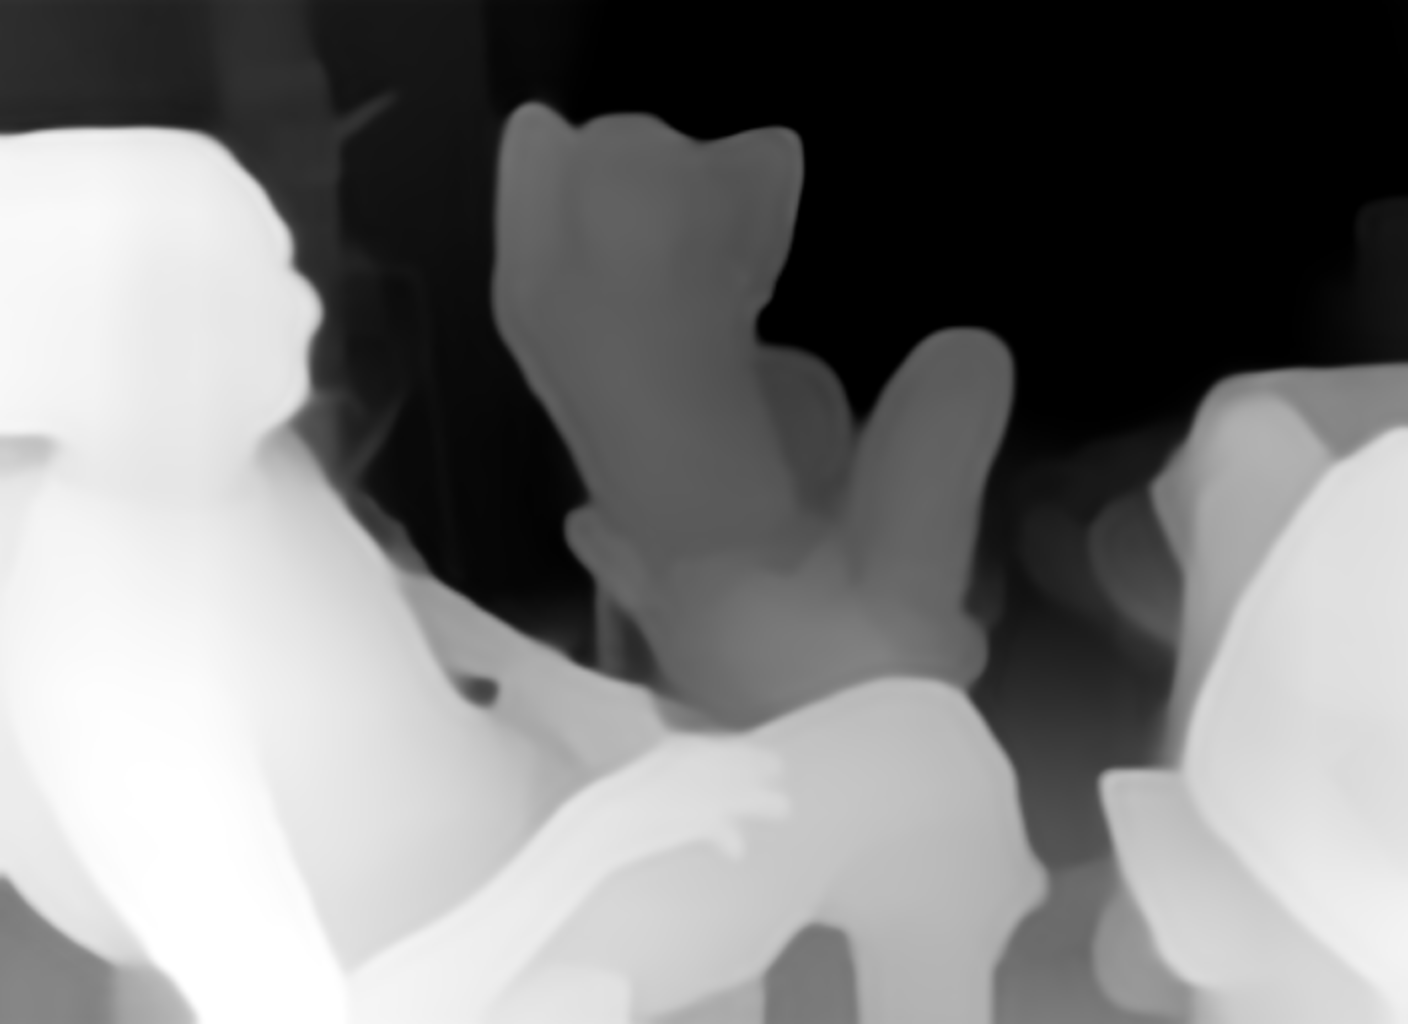

In [16]:
depth_image

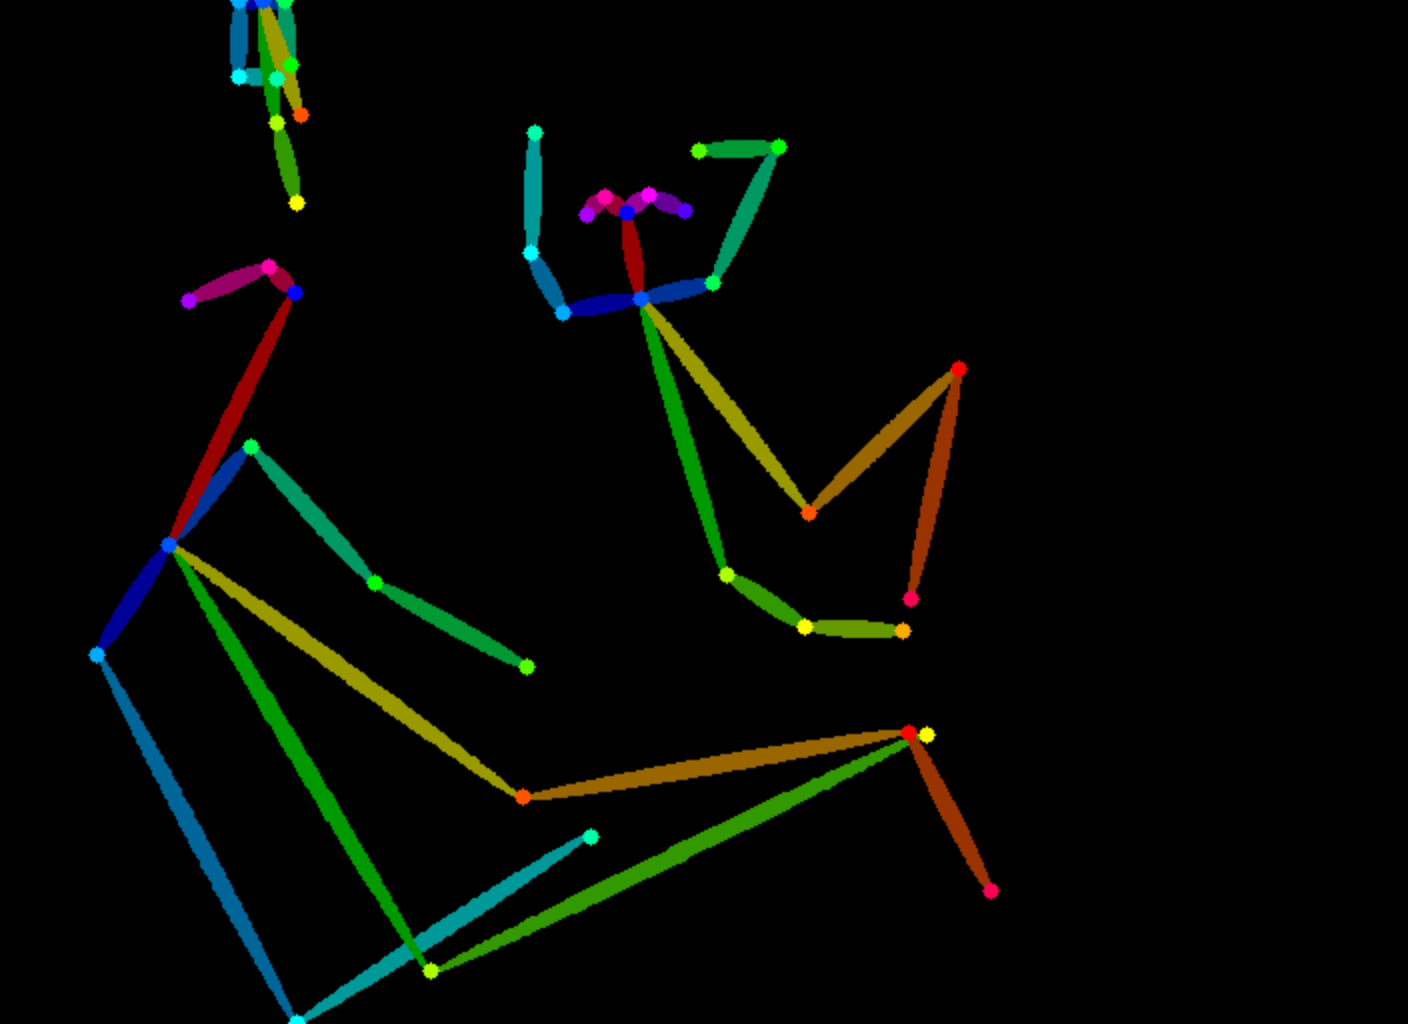

In [17]:
pose_image

In [20]:

res = pipeline(
    prompt=prompt,
    negative_prompt=config.NEGATIVE_PROMPT,
    image=[pose_image, depth_image],
    num_inference_steps=25,
    adapter_conditioning_scale=[1.0, 1.0],
    adapter_conditioning_factor=1.0,
    generator=image_pipeline.generator,
    guidance_scale=7.5,
)

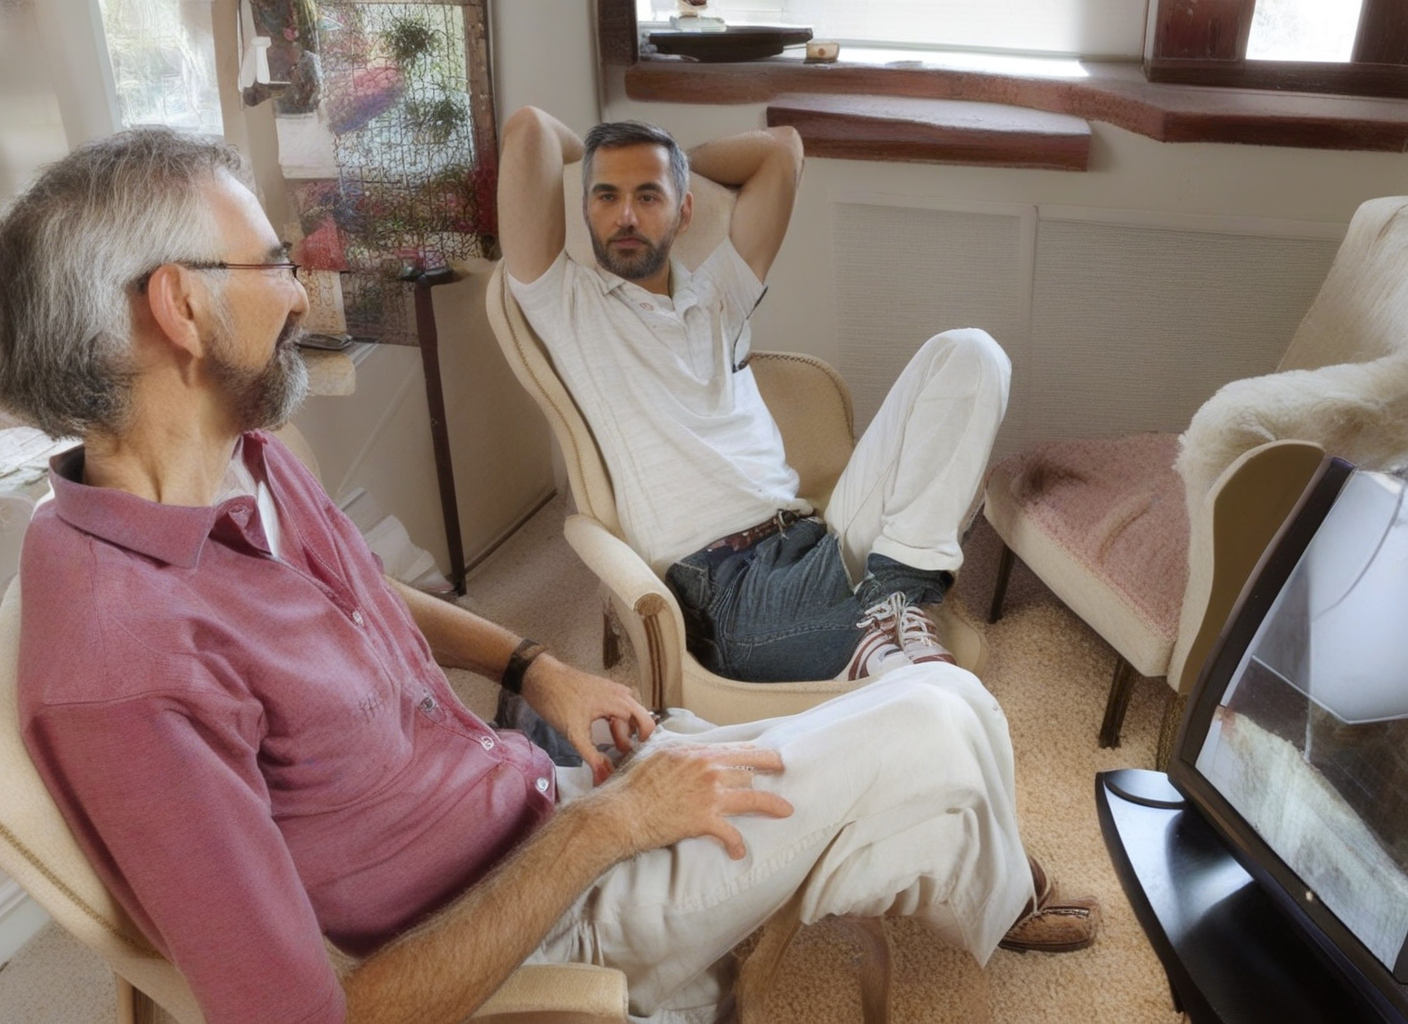

In [22]:
res.images[0]